In [1]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=False, input_shape=(200,200,3))

58892288/58889256 [==============================] - 5s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [5]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization, Input
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [0]:
for l in range(len(model.layers)):
    model.layers[l].trainable = False

In [0]:
keras_model = Sequential()

In [0]:
keras_model.add(model)
keras_model.add(Flatten())
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.3))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(8, activation='softmax'))

In [12]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

keras_model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
keras_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                

In [0]:
total_train = 13125
total_val = 558
epochs = 10
batch_size = 500
esc = EarlyStopping(monitor='val_acc', patience=4)


In [14]:
history = keras_model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    callbacks=[esc]
)

Epoch 1/10
26/26 [==============================] - 657s 25s/step - loss: 1.4512 - accuracy: 0.4675 - val_loss: 1.0751 - val_accuracy: 0.6562
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


26/26 [==============================] - 616s 24s/step - loss: 1.1756 - accuracy: 0.5264 - val_loss: 1.1544 - val_accuracy: 0.6875
Epoch 3/10
26/26 [==============================] - 633s 24s/step - loss: 1.0278 - accuracy: 0.6046 - val_loss: 0.9457 - val_accuracy: 0.6250
Epoch 4/10
26/26 [==============================] - 617s 24s/step - loss: 0.9976 - accuracy: 0.6322 - val_loss: 1.1529 - val_accuracy: 0.6250
Epoch 5/10
26/26 [==============================] - 604s 23s/step - loss: 1.0605 - accuracy: 0.5913 - val_loss: 1.1352 - val_accuracy: 0.5938
Epoch 6/10
26/26 [==============================] - 626s 24s/step - loss: 0.9234 - accuracy: 0.6575 - val_loss: 1.0342 - val_accuracy: 0.7812
Epoch 7/10
26/26 [==============================] - 636s 24s/step - loss: 0.9446 - accuracy: 0.6538 - val_loss: 1.2901 - val_accuracy: 0.5000
Epoch 8/10
26/26 [==============================] - 626s 24s/step - loss: 1.0119 - accuracy: 0.6370 - val_loss: 0.7734 - val_accuracy: 0.7500
Epoch 9/10
26/26 

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

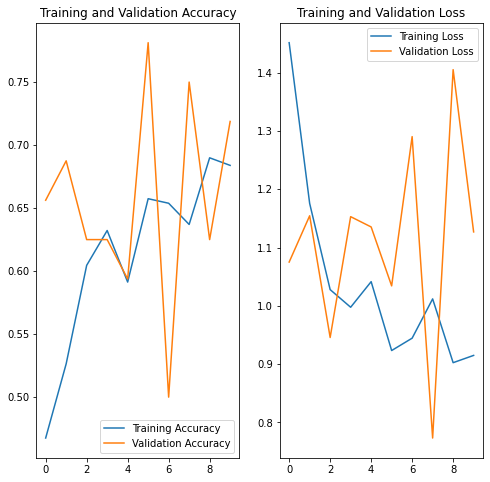

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
save_dir = "/gdrive/My Drive/DiplomWork/Second"
json_file = open(save_dir+"/VGG16ForEmotionDetection.json", "w")
model_json = keras_model.to_json()
json_file.write(model_json)
json_file.close()
keras_model.save_weights(save_dir+"/VGG16ForEmotionDetection_weights.h5")